<br>
# **의미론 분석**
## 1 Parsing
## 2 Semantic Analysis

<br>
# **자연어 분석과정**
<br>
1. 우선 언어학을 근간으로 한다
1. <strike>말소리를 연구하는 **음운론(Phonology)** : 음성인식</strike>
1. <strike>단어와 형태소를 연구하는 **형태론(Morphology)** : 형태소 분석</strike>
1. 문법과 맥락/담화를 각각 논의하는 **통사론(syntax)** : 문법적 구조분석(Passing)
1. 단어간의 의미차이를 구분하는 **의미론(Senmantics)** : 뉘앙스, 톤, 말하고자 하는 의도(긍/부정)
1. 그리고 한글과 영어의 문화적 차이
<br>
<img src="http://i.imgur.com/1bhgstG.png" align="left" width="650"/>
<br>

<br>
## **1 Parsing**
1. 문법적 구조분석
1. 형식문법(formal Grammer)으로 정의된 규칙에 부합여부를 찾는 작업
1. 의미판별을 위해, Sense(감각) 혹은 의미(meaning)에 기초하여, 둘 이상의 동일한 철자 혹은 동일한 소리를 구별하는 직업이다

<br>
### **01 문법적 구조를 활용한 분석**
형식문법(formal Grammer)으로 정의된 규칙에 부합여부를 찾는 작업

In [1]:
%%time
# 앞부분 Review
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Twitter
twitter = Twitter()
words = twitter.pos(text, stem=True)
print(words)

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 3.11 s, sys: 112 ms, total: 3.22 s
Wall time: 1.24 s


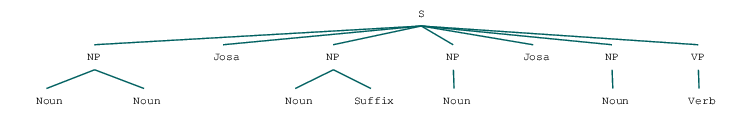

In [2]:
%matplotlib inline
from nltk import RegexpParser

grammar = """
NP: {<N.*>*<Suffix>?}   # 명사구를 정의한다
VP: {<V.*>*}            # 동사구를 정의한다
AP: {<A.*>*}            # 형용사구를 정의한다 """
parser = RegexpParser(grammar)
chunks = parser.parse(words)
chunks

In [3]:
# 영어 같은 경우 (nltk) 문법 규칙들이 많이 성립되어 있어다
# 1) CFG (Context Free Grammer) : '노암촘스키'가 만든 문법기준
# 2) ATIS 문법 : 공항 안내시스템 개발용 문법규칙
# 3) CKY 차트 파싱 알고리즘 

<br>
### **ex) Penn Treebank corpus**
Penn Treebank 의 Tags 추가하여 문법적 구조를 연구한 자료들을 NLTK에서 제공한다

In [4]:
# 개별 파일의 corpus 살펴보기
from nltk.corpus import treebank
# 단어 확인
print(treebank.words('wsj_0007.mrg'))        
# 단어와 Tagging 확인
print(treebank.tagged_words('wsj_0007.mrg')) 
# from nltk.corpus import treebank
print(treebank.parsed_sents('wsj_0007.mrg')[2])

['McDermott', 'International', 'Inc.', 'said', '0', ...]
[('McDermott', 'NNP'), ('International', 'NNP'), ...]
(S
  (NP-SBJ
    (NP (NNP Bailey) (NNP Controls))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Wickliffe)) (, ,) (NP (NNP Ohio)))))
    (, ,))
  (VP
    (VBZ makes)
    (NP
      (JJ computerized)
      (JJ industrial)
      (NNS controls)
      (NNS systems)))
  (. .))


In [5]:
# 확률적 차트 파싱
from nltk.grammar import toy_pcfg2
tokens = "Jack told Bob to bring my cookie".split()
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


<br>
### **02 어휘망 구조를 활용한 분석**
#### **ex) Word Net을 사용한 의미판별**
1. 워드넷은 개념을 바탕으로 네트워크를 구축한 대용량 지식베이스이다. 
1. 기본적인 개념 DB는 단어별 정의를 기록하고
1. 시소러스(동의어 반의어 사전) DB 에서는 용어 간 관계를 나타내기 위해 상하위관계, 동등관계, 부분-전체관계, 연관관계, 사례관계 등을 활용한다 
1. 워드넷에서는 동의관계, 반의관계, 상의관계, 하의관계, 분의 관계, 양식관계, 함의관계를 이용한 DB를 구축한다
<br>

<img src="http://www.nltk.org/images/wordnet-hierarchy.png" align="left" width="700">

In [6]:
# negation(부정)       	-
# conjunction(연결)    	&
# disjunction(분리)    	|
# implication(암시)    	->
# equivalence(동등)    	<->

# Boolean로 사용가능한 연산자를 출력
import nltk
nltk.boolean_ops()

negation       	-
conjunction    	&
disjunction    	|
implication    	->
equivalence    	<->


<br>
### **유사성 알고리즘 :Path Distance Similarity**
https://www.youtube.com/watch?v=c9zcE1bQhm8

<img src="https://image.slidesharecdn.com/lec-13-pptx-lsa303-introduction-to-computational-linguistics2632/95/lec-13-pptx-lsa303-introduction-to-computational-linguistics-37-638.jpg?cb=1422299155" align="left" width="400px"/>

<br>
### **Wu-Palmer Similarity** 
https://www.slideshare.net/sharaf/text-similarity

<img src="https://image.slidesharecdn.com/textsimilarity-100211062411-phpapp02/95/text-similarity-16-728.jpg?cb=1265869478" align="left" width="400px"/>

<br></br>
### **ex) Earley 차트 파싱 알고리즘**
1970년 발표한 알고리즘으로 Top-Down 파싱과 유사하고 좌측방향 재귀처리를 통해서 문장을 분석한다

In [7]:
# NLTK 차트파서를 사용한 파싱
import nltk
nltk.parse.featurechart.demo( print_times = False, print_grammar = True, 
                             parser = nltk.parse.featurechart.FeatureChartParser, sent = 'I saw a dog' )


Grammar with 18 productions (start state = S[])
    S[] -> NP[] VP[]
    PP[] -> Prep[] NP[]
    NP[] -> NP[] PP[]
    VP[] -> VP[] PP[]
    VP[] -> Verb[] NP[]
    VP[] -> Verb[]
    NP[] -> Det[pl=?x] Noun[pl=?x]
    NP[] -> 'John'
    NP[] -> 'I'
    Det[] -> 'the'
    Det[] -> 'my'
    Det[-pl] -> 'a'
    Noun[-pl] -> 'dog'
    Noun[-pl] -> 'cookie'
    Verb[] -> 'ate'
    Verb[] -> 'saw'
    Prep[] -> 'with'
    Prep[] -> 'under'

* FeatureChartParser
Sentence: I saw a dog
|. I .saw. a .dog.|
|[---]   .   .   .| [0:1] 'I'
|.   [---]   .   .| [1:2] 'saw'
|.   .   [---]   .| [2:3] 'a'
|.   .   .   [---]| [3:4] 'dog'
|[---]   .   .   .| [0:1] NP[] -> 'I' *
|[--->   .   .   .| [0:1] S[] -> NP[] * VP[] {}
|[--->   .   .   .| [0:1] NP[] -> NP[] * PP[] {}
|.   [---]   .   .| [1:2] Verb[] -> 'saw' *
|.   [--->   .   .| [1:2] VP[] -> Verb[] * NP[] {}
|.   [---]   .   .| [1:2] VP[] -> Verb[] *
|.   [--->   .   .| [1:2] VP[] -> VP[] * PP[] {}
|[-------]   .   .| [0:2] S[] -> NP[] VP[] *
|. 

<br>
## 한글의 말뭉치의 경우
1. 2007년에 멈춘이유 : https://www.bloter.net/archives/260569
1. 2017년 11월 : http://www.yonhapnews.co.kr/bulletin/2017/10/08/0200000000AKR20171008048600005.HTML
1. http://news.mk.co.kr/newsRead.php?sc=30100009&cm=&no=443475&year=2018

<br>
## **2 Semantic Analysis**
의미분석

<br>
### **01 DataBase 의 활용**
감정분석 : lexicon (어휘목록) 을 사용해서 수행할 수 있다
1. labMT (10,000단어 분석)
2. Warringer (13,915단어 분석)
3. OpinionFinder's Subjectivity Lexic (8221단어 분석)
4. ANEW  (1034단어 분석)    : Affective Norms for English Words
5. AFINN (2477단어 분석)    : Finn Arup Nielson 에 의한 분류
6. Balance Affective (277 단어) : 1(긍정), 2(부정), 3(불안정), 4(중립)
7. BAWL  (2200단어 분석)    : Berlin Affective Word List Reloaded
8. BFAN  (210단어로 구성)    : Bilingual Finnish Affective Norms
9. CDGE  : Compass DeRose Guide to Emotion Words
10. DAL  : Dictionary of Affect in Language
11. WDAL : Whissell's Dictionary of Affect in Language
12. etc....

<br>
### **02 On tology 구축**
1. 철학의 분과 학문 가운데 형이상학의 대표적인 세부 학제 중 하나. 
1. 전통적으로 "존재로서의 존재(being qua being)"를 다루는 학제로 정의
1. 컴퓨터과학에서는 이를 응용하여 **컴퓨터 공간 상에서 데이터 및 데이터들을 아우르는 개념들에 관한 "존재론"** 을 의미하는 용도로 활용

<img src="https://image.slidesharecdn.com/kswc2009-091206064639-phpapp02/95/-18-728.jpg" align='left' width='500'>

<br>
## **2 나이브베이즈 활용**
감정분석 : lexicon (어휘목록) 을 사용해서 수행할 수 있다

1. 어휘 목록이 없는 경우 머신러닝 이론을 활용
1. 나이브베이즈 이론을 활용한다 (https://www.youtube.com/watch?list=PLVNY1HnUlO241gILgQloWAs0xrrkqQfKe&v=3JWLIV3NaoQ)
1. 구글을 스팸메일 Filtering 에 사용되는 방법
1. 독립적 개별 단어가 나타날 확률(Likelyhood(우도값))을 사용하여 해당 문서를 구분한다
1. 우선순위를 정하지 않아서 구조가 간단하고 결과론적으로 성능도 좋아서 아직까지도 많이 사용되는 이론이다
1. http://gomguard.tistory.com/69
1. https://ratsgo.github.io/machine%20learning/2017/05/18/naive/

<br>
### **01 NLKT의 영화리뷰 활용**
1. nltk 에 기본제공되는 긍정/ 부정 영화리뷰 1000개를 활용
1. nltk.NaiveBayesClassifier() 로 모델을 학습한 뒤 이를 활용한다

In [8]:
# 긍정 리뷰 1000 개, 부정 리뷰 1000 개 nltk 모듈에 저장
from nltk.corpus import movie_reviews

print('Category : {}\n  Length : {}'.format(
    movie_reviews.categories(),
    len(movie_reviews.fileids(movie_reviews.categories()[1])) ))

print('\npos_file_list : {} \nneg_file_list : {}'.format(
    movie_reviews.fileids(movie_reviews.categories()[0])[:5],
    movie_reviews.fileids(movie_reviews.categories()[1])[:5] ))

Category : ['neg', 'pos']
  Length : 1000

pos_file_list : ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt'] 
neg_file_list : ['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt']


In [9]:
# ! cat /home/markbaum/nltk_data/corpora/movie_reviews/neg/cv435_24355.txt
example = """a couple of criminals ( mario van peebles and loretta devine ) move into a rich family's house in 
hopes of conning them out of their jewels . however... """

In [10]:
# 긍/부정 분류된 textdml token을 뒤섞어서 1개로 합친다
# 39,768개 중  2,000개  Train 데이터 표본의 추출`
import nltk, random
docs = [(list(movie_reviews.words(fid)), cat) 
        for cat in movie_reviews.categories()   # ['neg', 'pos']
        for fid in movie_reviews.fileids(cat)]  # 'neg/cv000_29416.txt', ....

random.shuffle(docs)
all_tokens     = nltk.FreqDist(x.lower()    for  x  in  movie_reviews.words())
token_features = list(all_tokens.keys())[:2000]
all_tokens

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [11]:
# 리뷰 데이터의 Token이 표본DB 포함여부 판단
# 리뷰 txt의 token을 집합으로 추출
def doc_features(docs):
    doc_words = set(docs)      
    features  = {'word( %s )'%word : (word in doc_words) 
                 for word in token_features }
    return features

In [12]:
# docs (긍/부정리뷰의 token 모음) 데이터의 
# Train(90%), Test(10%)로 나눈다 
feature_sets = [(doc_features(d), c) for (d,c) in docs]
train_sets, test_sets = feature_sets[100:], feature_sets[:100]

# 나이브 베이즈 분류기로 정확도를 판단
classifiers = nltk.NaiveBayesClassifier.train(train_sets)
print('Accuracy :', nltk.classify.accuracy(classifiers, test_sets))
classifiers.show_most_informative_features() 

Accuracy : 0.81
Most Informative Features
   word( unimaginative ) = True              neg : pos    =      7.8 : 1.0
          word( suvari ) = True              neg : pos    =      7.1 : 1.0
          word( shoddy ) = True              neg : pos    =      7.1 : 1.0
            word( mena ) = True              neg : pos    =      7.1 : 1.0
      word( schumacher ) = True              neg : pos    =      7.1 : 1.0
       word( atrocious ) = True              neg : pos    =      6.3 : 1.0
         word( singers ) = True              pos : neg    =      6.3 : 1.0
          word( justin ) = True              neg : pos    =      5.9 : 1.0
          word( turkey ) = True              neg : pos    =      5.7 : 1.0
    word( surveillance ) = True              neg : pos    =      5.7 : 1.0


<img src="https://i.imgur.com/u5kdniF.png" align="left" width='800'>

<br>
### **02 Gensim 을 활용한  긍정/ 부정 영화리뷰 활용**
1. Naver 영화 리뷰 14,000개의 데이터를 활용한다
1. 관련 GitHub (https://github.com/e9t/nsmc)
1. 관련 Slide 2015 PyCon (https://www.lucypark.kr/slides/2015-pyconkr/)

### DataSet 
Naver sentiment movie corpus v1.0
1. Maas et al., 2011 데이터셋 참고
1. 데이터 출처: 네이버
1. 영화 당 100개의 140자평(이하 '리뷰')을 초과하지 않음
1. 총 20만 개 리뷰 **ratings.txt** (수집된 64만개 중 샘플링)
    1. **ratings_train.txt** : 15만, **ratings_test.txt** : 5만
    1. 긍정/부정 리뷰의 비율을 동일하게 샘플링 (i.e., random guess yields 50% accuracy)
    1. 중립 리뷰는 포함하지 않음


In [13]:
! cat ./data/ratings_train.txt | head -n 5

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
cat: 쓰기 오류: 파이프가 깨어짐


<br>
#### ** 1) TEXT 데이터 가공하기**
1. text 파일을 불러오기
1. 불러온 데이터를 Konlpy 로 tag 추가하기

In [14]:
# 리뷰 Text를 Python 객체로 불러온다
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
        
    from random import randint
    random_data = [data[randint(1, len(data))]  for no in range(int(len(data)/50)) ]
    return random_data

train_data = read_data('./data/ratings_train.txt')
test_data  = read_data('./data/ratings_test.txt')
print('Train_data : {}\nsample     : {}'.format(len(train_data), train_data[:3]))
print('Test_data  : {}\nsample     : {}'.format(len(test_data), test_data[:3]))

Train_data : 3000
sample     : [['9287304', '가장 성룡스러운 영화 ㅋ 재밌음', '1'], ['9833070', 'CGV야 만우절 낚시하니까 조으디?', '0'], ['1223918', '그녀의 숭고한 삶에 경의를 표합니다.', '1']]
Test_data  : 1000
sample     : [['4354632', '마음이 훈훈해지는 영화', '1'], ['2399796', '쩝 분노를 느끼고 싶을때 잠이안올때 볼만함', '0'], ['5558452', '오죽하면 내가 평점남기러 왔겠냐 ㅋㅋㅋㅋㅋ', '0']]


In [15]:
%%time
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize(doc):
    result = ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
    return result 

train_docs = [(tokenize(row[1]), row[2])    for row in train_data]
test_docs  = [(tokenize(row[1]), row[2])    for row in test_data]

from pprint import pprint
pprint(train_docs[:2])

[(['가장/Noun',
   '성룡/Noun',
   '스러운/Josa',
   '영화/Noun',
   'ㅋ/KoreanParticle',
   '재밌다/Adjective'],
  '1'),
 (['CGV/Alpha',
   '야/Exclamation',
   '만우절/Noun',
   '낚시/Noun',
   '하다/Verb',
   '좋다/Adjective',
   '?/Punctuation'],
  '0')]
CPU times: user 10.4 s, sys: 101 ms, total: 10.5 s
Wall time: 5.29 s


In [16]:
# 인덱스와 긍/부정평가를 제외한 Train_data 의 Token만 추출하여 목록을 만든다
tokens = [t   for d in train_docs 
              for t in d[0]]
print(len(tokens))

43925


<br>
#### ** 2) nltk 연산 모델 활용하기**
1. nltk.Text()를 활용하면 Exploration이 편하다
1. 필요한 함수들을 만들기 보다는, nltk/ Gensim에 마련된 모듈

In [17]:
# returns frequency distribution
import nltk
text = nltk.Text(tokens, name='NMSC')
print("number of Token : {} \nunique Token    : {}\n".format(
    len(text.tokens), len(set(text.tokens))))
pprint(text.vocab().most_common(10))    

number of Token : 43925 
unique Token    : 6548

[('./Punctuation', 1456),
 ('영화/Noun', 1080),
 ('하다/Verb', 1014),
 ('이/Josa', 752),
 ('보다/Verb', 666),
 ('의/Josa', 605),
 ('에/Josa', 570),
 ('../Punctuation', 568),
 ('가/Josa', 539),
 ('을/Josa', 484)]


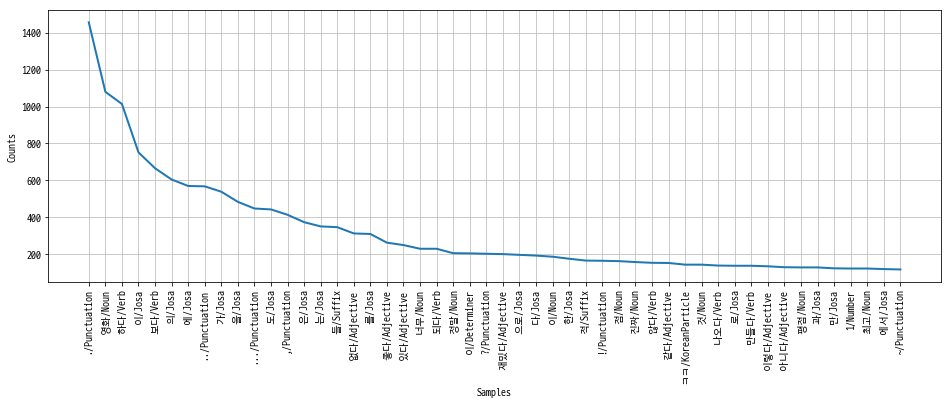

In [18]:
%matplotlib inline
from matplotlib import font_manager, rc
# 한글폰트를 별도로 불러온다
font_fname = './data/D2Coding.ttf'     
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
text.plot(50) 

<br>
#### ** 2) 모델의 정확도/ 일반화를 높이는 모델을 만든다**
1. 6,500 개의 token 중 상위 2,000 개를 활용하여 모델을 만든다
1. 앞에서 살펴본 tf-idf 에서 알 수 있듯이 과연 빈도가 높다고 식별력이 좋은 단어인지는 의심을 필요
1. 전체 DataSet을 기본으로 idf 값들을 연산한 뒤, 이를 바탕으로 고빈도의 sample을 추출후
1. .most_common() 중에서도 **tf-idf** 비중을 포함한 가중치를 연산하면 더 좋은 결과를 도출 가능하다

In [19]:
%%time
# 여기서는 최빈도 단어 2000개를 사용
selected_words = [f[0] for f in text.vocab().most_common(2000)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

# 시간과 효율성을 높이기 위해서 training corpus의 일부만 사용한다
train_docs = train_docs[:10000]
train_xy   = [(term_exists(d), c) for d, c in train_docs]
test_xy    = [(term_exists(d), c) for d, c in test_docs]

CPU times: user 7.18 s, sys: 314 ms, total: 7.49 s
Wall time: 7.51 s


In [20]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print('네이버 긍부정 모델의 Accuracy : {}'.format(
    nltk.classify.accuracy(classifier, test_xy)))
# => 0.80418
# 0 : 부정적인 리뷰
# 1 : 긍정적인 리뷰
classifier.show_most_informative_features(10)

네이버 긍부정 모델의 Accuracy : 0.792
Most Informative Features
        exists(쓰레기/Noun) = True                0 : 1      =     20.8 : 1.0
  exists(재미없다/Adjective) = True                0 : 1      =     16.8 : 1.0
         exists(별로/Noun) = True                0 : 1      =     15.1 : 1.0
         exists(점도/Noun) = True                0 : 1      =     14.8 : 1.0
         exists(찍다/Verb) = True                0 : 1      =     13.4 : 1.0
         exists(잔잔/Noun) = True                1 : 0      =     13.3 : 1.0
         exists(명작/Noun) = True                1 : 0      =     11.5 : 1.0
         exists(수작/Noun) = True                1 : 0      =     10.7 : 1.0
         exists(실망/Noun) = True                0 : 1      =     10.7 : 1.0
          exists(적/Noun) = True                1 : 0      =     10.0 : 1.0
CPU times: user 11.7 s, sys: 3.99 ms, total: 11.7 s
Wall time: 11.7 s


In [21]:
# 전체를 사용하면 0.804가 나오지만
# 1 / 50 을 사용한 모델에서는 이보다는 약간 낮은 0.79의 정확도를 검증가능한 모델이 생성되었다

In [22]:
text.concordance('섹시하다/Adjective', lines=10)

Displaying 3 of 3 matches:
tuation 일본/Noun 여자/Noun 너무/Noun 섹시하다/Adjective 같다/Adjective 재미/Noun 도/Josa 없다/
osa 어렵다/Adjective ./Punctuation 섹시하다/Adjective 귀엽다/Adjective 않다/Verb 뭘/Noun 어쩌
~!!/Punctuation 엉덩이/Noun 만/Josa 섹시하다/Adjective ~/Punctuation 우에노/Noun 주리/Noun 
